In [1]:
#Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels as sms
import scipy.stats 
import math
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score  
from sklearn.metrics import accuracy_score 
from sklearn.metrics import recall_score 
from sklearn.metrics import precision_score
#

In [3]:
df = pd.read_csv('~/Downloads/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# Unique value of the target value
print(f"Unique values of target variable :- \n{df['Class'].unique()}")

Unique values of target variable :- 
[0 1]


Text(0.5, 1.0, 'Target Distribution')

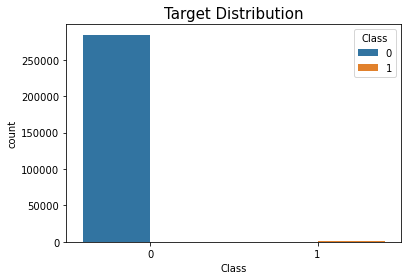

In [5]:
# Plotting the Target Distribution
ax = sns.countplot(x="Class",hue="Class", data=df)
df["Class"].value_counts().transpose()
plt.title('Target Distribution',fontsize = 15)

In [6]:
# Dataset Size
display(df.shape)

(284807, 31)

In [7]:
# Remove irrevlevant columns
df1 = df.drop(['Time'], axis = 1)
print(f"list of feature names agter removing Time Column :- \n{df1.columns}")

list of feature names agter removing Time Column :- 
Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class'],
      dtype='object')


In [8]:
# Summary of data
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


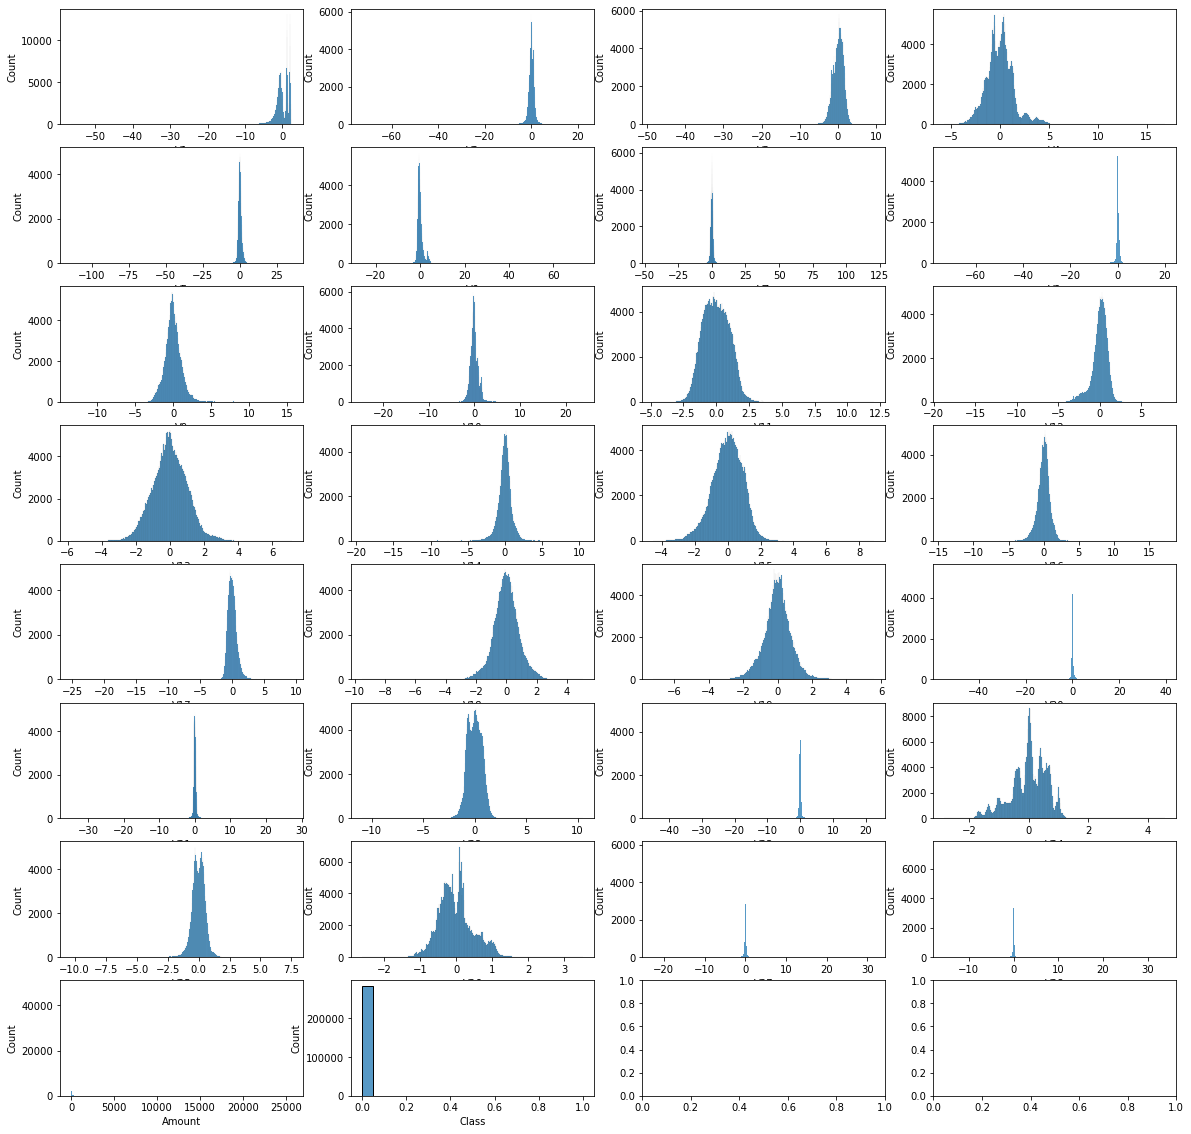

In [9]:
# Histogram graphs
f, axes = plt.subplots(8,4, figsize=(20,20))
for ax, feature in zip(axes.flat, df1.columns):
    sns.histplot(df1[feature],ax=ax)

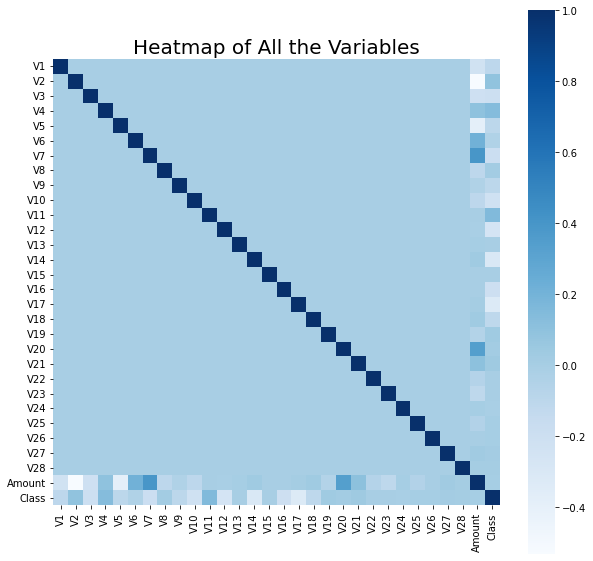

In [10]:
# HeatMap
plt.figure(figsize=(10,10)) 
hm = df[['V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount','Class']]
corMat = hm.corr(method='pearson')
sns.heatmap(corMat,square=True,cmap="Blues")
plt.title('Heatmap of All the Variables', fontsize=20)
plt.show()

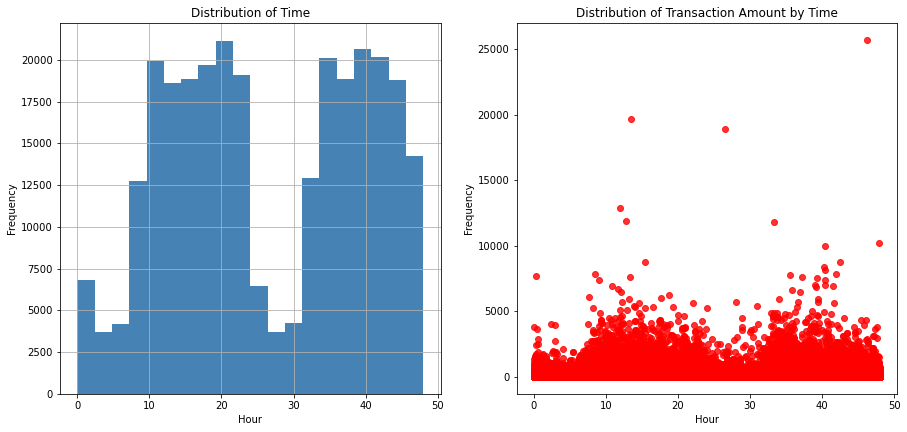

In [11]:
# Time distribution in hours and with Transaction Amount
plt.subplot(2, 2, 1)
(df['Time']/3600).hist(figsize=(15,15), color = "steelblue", bins = 20)
plt.title("Distribution of Time")
plt.xlabel("Hour")
plt.ylabel("Frequency")

# Transaction amount distribution by hours
plt.subplot(2, 2, 2)
plt.scatter(x = df['Time']/3600, y = df['Amount'], alpha = .8, color = "red")
plt.title("Distribution of Transaction Amount by Time")
plt.xlabel("Hour")
plt.ylabel("Frequency")
plt.show()

In [12]:
# Summary of Fraud & Normal Transaction 
print("Fraud")
print(df.Time[df.Class == 1].describe())
print()
print("Normal")
print(df.Time[df.Class == 0].describe())

Fraud
count       492.000000
mean      80746.806911
std       47835.365138
min         406.000000
25%       41241.500000
50%       75568.500000
75%      128483.000000
max      170348.000000
Name: Time, dtype: float64

Normal
count    284315.000000
mean      94838.202258
std       47484.015786
min           0.000000
25%       54230.000000
50%       84711.000000
75%      139333.000000
max      172792.000000
Name: Time, dtype: float64


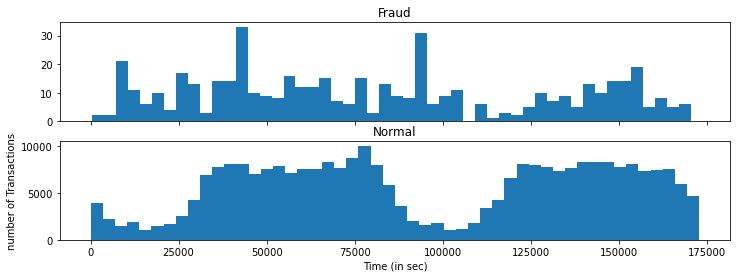

In [13]:
# Fraud vs. Noraml in Transaction
g, (ax1, ax2)=plt.subplots(2,1,sharex=True, figsize=(12,4))

bins=50

ax1.hist(df.Time[df.Class == 1], bins=bins)
ax1.set_title('Fraud')

ax2.hist(df.Time[df.Class == 0], bins=bins)
ax2.set_title('Normal')

plt.xlabel('Time (in sec)')
plt.ylabel('number of Transactions')
plt.show()

In [14]:
# Modeling process 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Make the X and Y inputs
data_x = df.drop('Class', axis = 1)
data_y = df['Class']

# Split the data into training and testing, use 30% data to evaluate the models 
train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, test_size = 0.3, random_state = 123)

train_x = scaler.fit_transform(train_x)
test_x = scaler.transform(test_x)

print("Training data has {} rows and {} variables".format(train_x.shape[0], train_x.shape[1]))
print("Testing data has {} rows and {} variables".format(test_x.shape[0], test_x.shape[1]))

Training data has 199364 rows and 30 variables
Testing data has 85443 rows and 30 variables


In [15]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix

dummy = DummyClassifier(strategy="stratified")
dummy.fit(train_x, train_y)
dummy_pred = dummy.predict(test_x)

# Print test outcome 
print(confusion_matrix(test_y, dummy_pred))
print('\n')
print(classification_report(test_y, dummy_pred))

[[85149   134]
 [  160     0]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85283
           1       0.00      0.00      0.00       160

    accuracy                           1.00     85443
   macro avg       0.50      0.50      0.50     85443
weighted avg       1.00      1.00      1.00     85443



In [16]:
#Build the Logistic Regression Classifier model 
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state = 100)
logreg.fit(train_x, train_y)

pd.DataFrame(logreg.coef_, columns = df.drop('Class', axis=1).columns)
pred_y = logreg.predict(test_x)

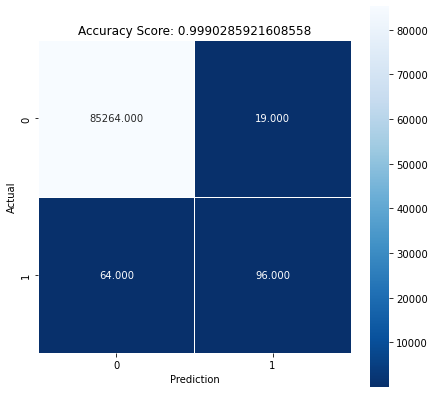

In [17]:
# Print the confusion matrix for the model 
conf_matrix = confusion_matrix(test_y, pred_y)

plt.figure(figsize = (7,7))
sns.heatmap(conf_matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.title("Accuracy Score: {}".format(accuracy_score(test_y, pred_y)))
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.show()

In [18]:
# Since the data is highly imbalanced, it is not enough to purly rely on the accuracy score to evaluate the model. Recall and Prescision here plays more important roles
print("The recall score for prediction is {:0.2f}".format(recall_score(test_y, pred_y, pos_label=1)))
print("The prescision score for predion is {:0.2f}".format(precision_score(test_y, pred_y, pos_label=1)))
print("\n")
print(classification_report(test_y, pred_y))

The recall score for prediction is 0.60
The prescision score for predion is 0.83


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85283
           1       0.83      0.60      0.70       160

    accuracy                           1.00     85443
   macro avg       0.92      0.80      0.85     85443
weighted avg       1.00      1.00      1.00     85443



/Users/yejijung/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Precision-Recall curve for Logistic Regression Classifier')

<Figure size 504x504 with 0 Axes>

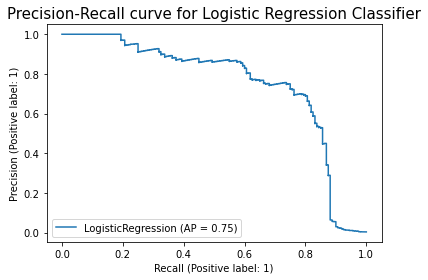

In [19]:
# Print out the Recall-Precision Plot
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

plt.figure(figsize = (7,7))
plot_precision_recall_curve(logreg, test_x, test_y)
plt.title("Precision-Recall curve for Logistic Regression Classifier",fontsize=15)